# Range Search Report

This report is to measure and visualise the time complexity of each approach. For a thorough explanation view the pdf.

## Task 1.1

Given a list we would like to be able to query an arbitrary range, and append to this list upon request. This approach is trivial, and is only meant to be a benchmark. The time complexity for both functions is $\Theta(n)$. Below is an example on how it performs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import repeat

def code_to_test():
    mylist = []
    
    for i in l:
        t.add_new_numbers(mylist, i)
        
    for q in qs:
        t.query(mylist, min(q), max(q))

sizes = [100, 1000, 5000, 10000]
ls = [s for item in sizes for s in repeat(item,4)]
qs = [s for s in sizes] * 4

def run(task):
    for s1 in sizes:
        l = np.random.randint(low=0, high=100000, size=(s1))
        for s2 in sizes:
            qs = np.random.randint(low=0, high=100000, size=(s2,2))
            elapsed_time = %timeit -o code_to_test()
            task.append(elapsed_time.best)

In [5]:
import Task11 as t

task11_times = []
run(task11_times)

1.4 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.4 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69.8 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
139 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.7 ms ± 868 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
107 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
518 ms ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.08 s ± 88.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
63.6 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
560 ms ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.02 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.39 s ± 240 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
140 ms ± 9.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.04 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.11 s ± 91.1 ms per loop (mean ± 

And an eternity later we may plot their performance.

Text(0.5, 0, 'Time in ms')

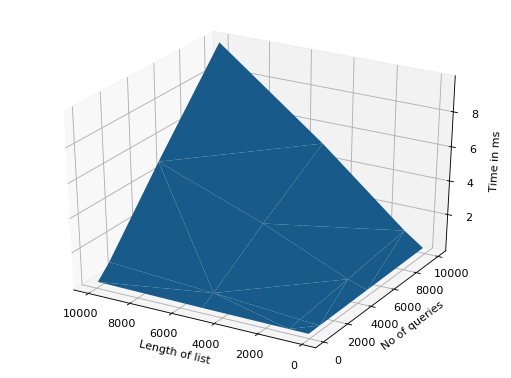

In [6]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(ls,qs,task11_times)
ax.invert_xaxis()
ax.set_xlabel('Length of list')
ax.set_ylabel('No of queries')
ax.set_zlabel('Time in ms')

The 3D graph might be a bit unnecessary, it however inmediatly shows that the queries are costly, and subsequent queries do not gain anything from previous ones. The linear nature of this approach is also apparent.

## Task12

For the next approach, we build the list by ordering it upon every append. This is of course costly, but will gain better query performance. The query takes advantage of the ordered structure, and uses binary search for the startpoint of the interval. From that on it returns elements until they fall out of the interval, then it breaks.

### Complexity 
Given that we want to initialise a list of $n$ values, we call the function $n$ times. We put the new element at the end of the list, $\Theta(1)$ and then we sort it using a sorting algorithm, $\Theta(n\log_2n)$. So the total complexity is $\Theta(n^2\log_2⁡n)$, the complexity for the query is,as for binary search $\Theta(log_2n) + k$, for the to be returned $k$ elements.

In [7]:
import Task12 as t
task12_times = []

run(task12_times)

939 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.46 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.9 ms ± 8.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.4 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.1 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
171 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
325 ms ± 97.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
362 ms ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
466 ms ± 82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.02 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.71 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.36 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.64 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.76 s ± 84.2 ms per loop (mean ± std

Text(0.5, 0, 'Time in ms')

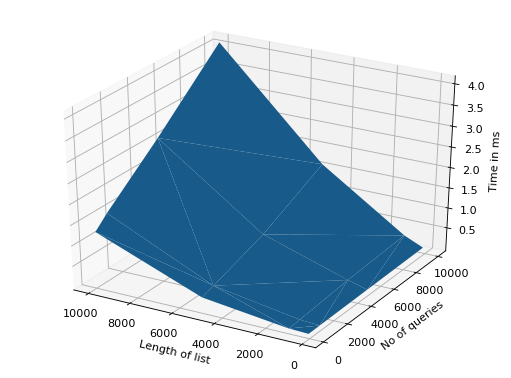

In [8]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(ls,qs,task12_times)
ax.invert_xaxis()
ax.set_xlabel('Length of list')
ax.set_ylabel('No of queries')
ax.set_zlabel('Time in ms')